# Spherical harmonics surface approximation

In this notebook, we will demonstrate the surface approximation with a basis of spherical harmonics functions.

In [1]:
import napari
import napari_stress
import napari_process_points_and_surfaces as nppas
import vedo
import tqdm

from napari.types import PointsData
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt

In [2]:
root = r'C:\Users\johamuel\Documents\BiAPoL\Shared\BiAPoLprojects\20_STRESS\1_first_data'
filename = os.path.join(root, 'ExampleTifSequence-InteriorLabel-vsx_2.076um-vsz_3.998um-TimeInterval_3.00min-21timesteps_analyzed.csv')
df = pd.read_csv(filename, sep = '\t')

In [3]:
pointcloud = df[['t', 'x1', 'x2', 'x3']].to_numpy()

We need to convert this to a list of pointclouds:

In [4]:
Converter = napari_stress.TimelapseConverter()
pointcloud_list = Converter.data_to_list_of_data(pointcloud, PointsData)

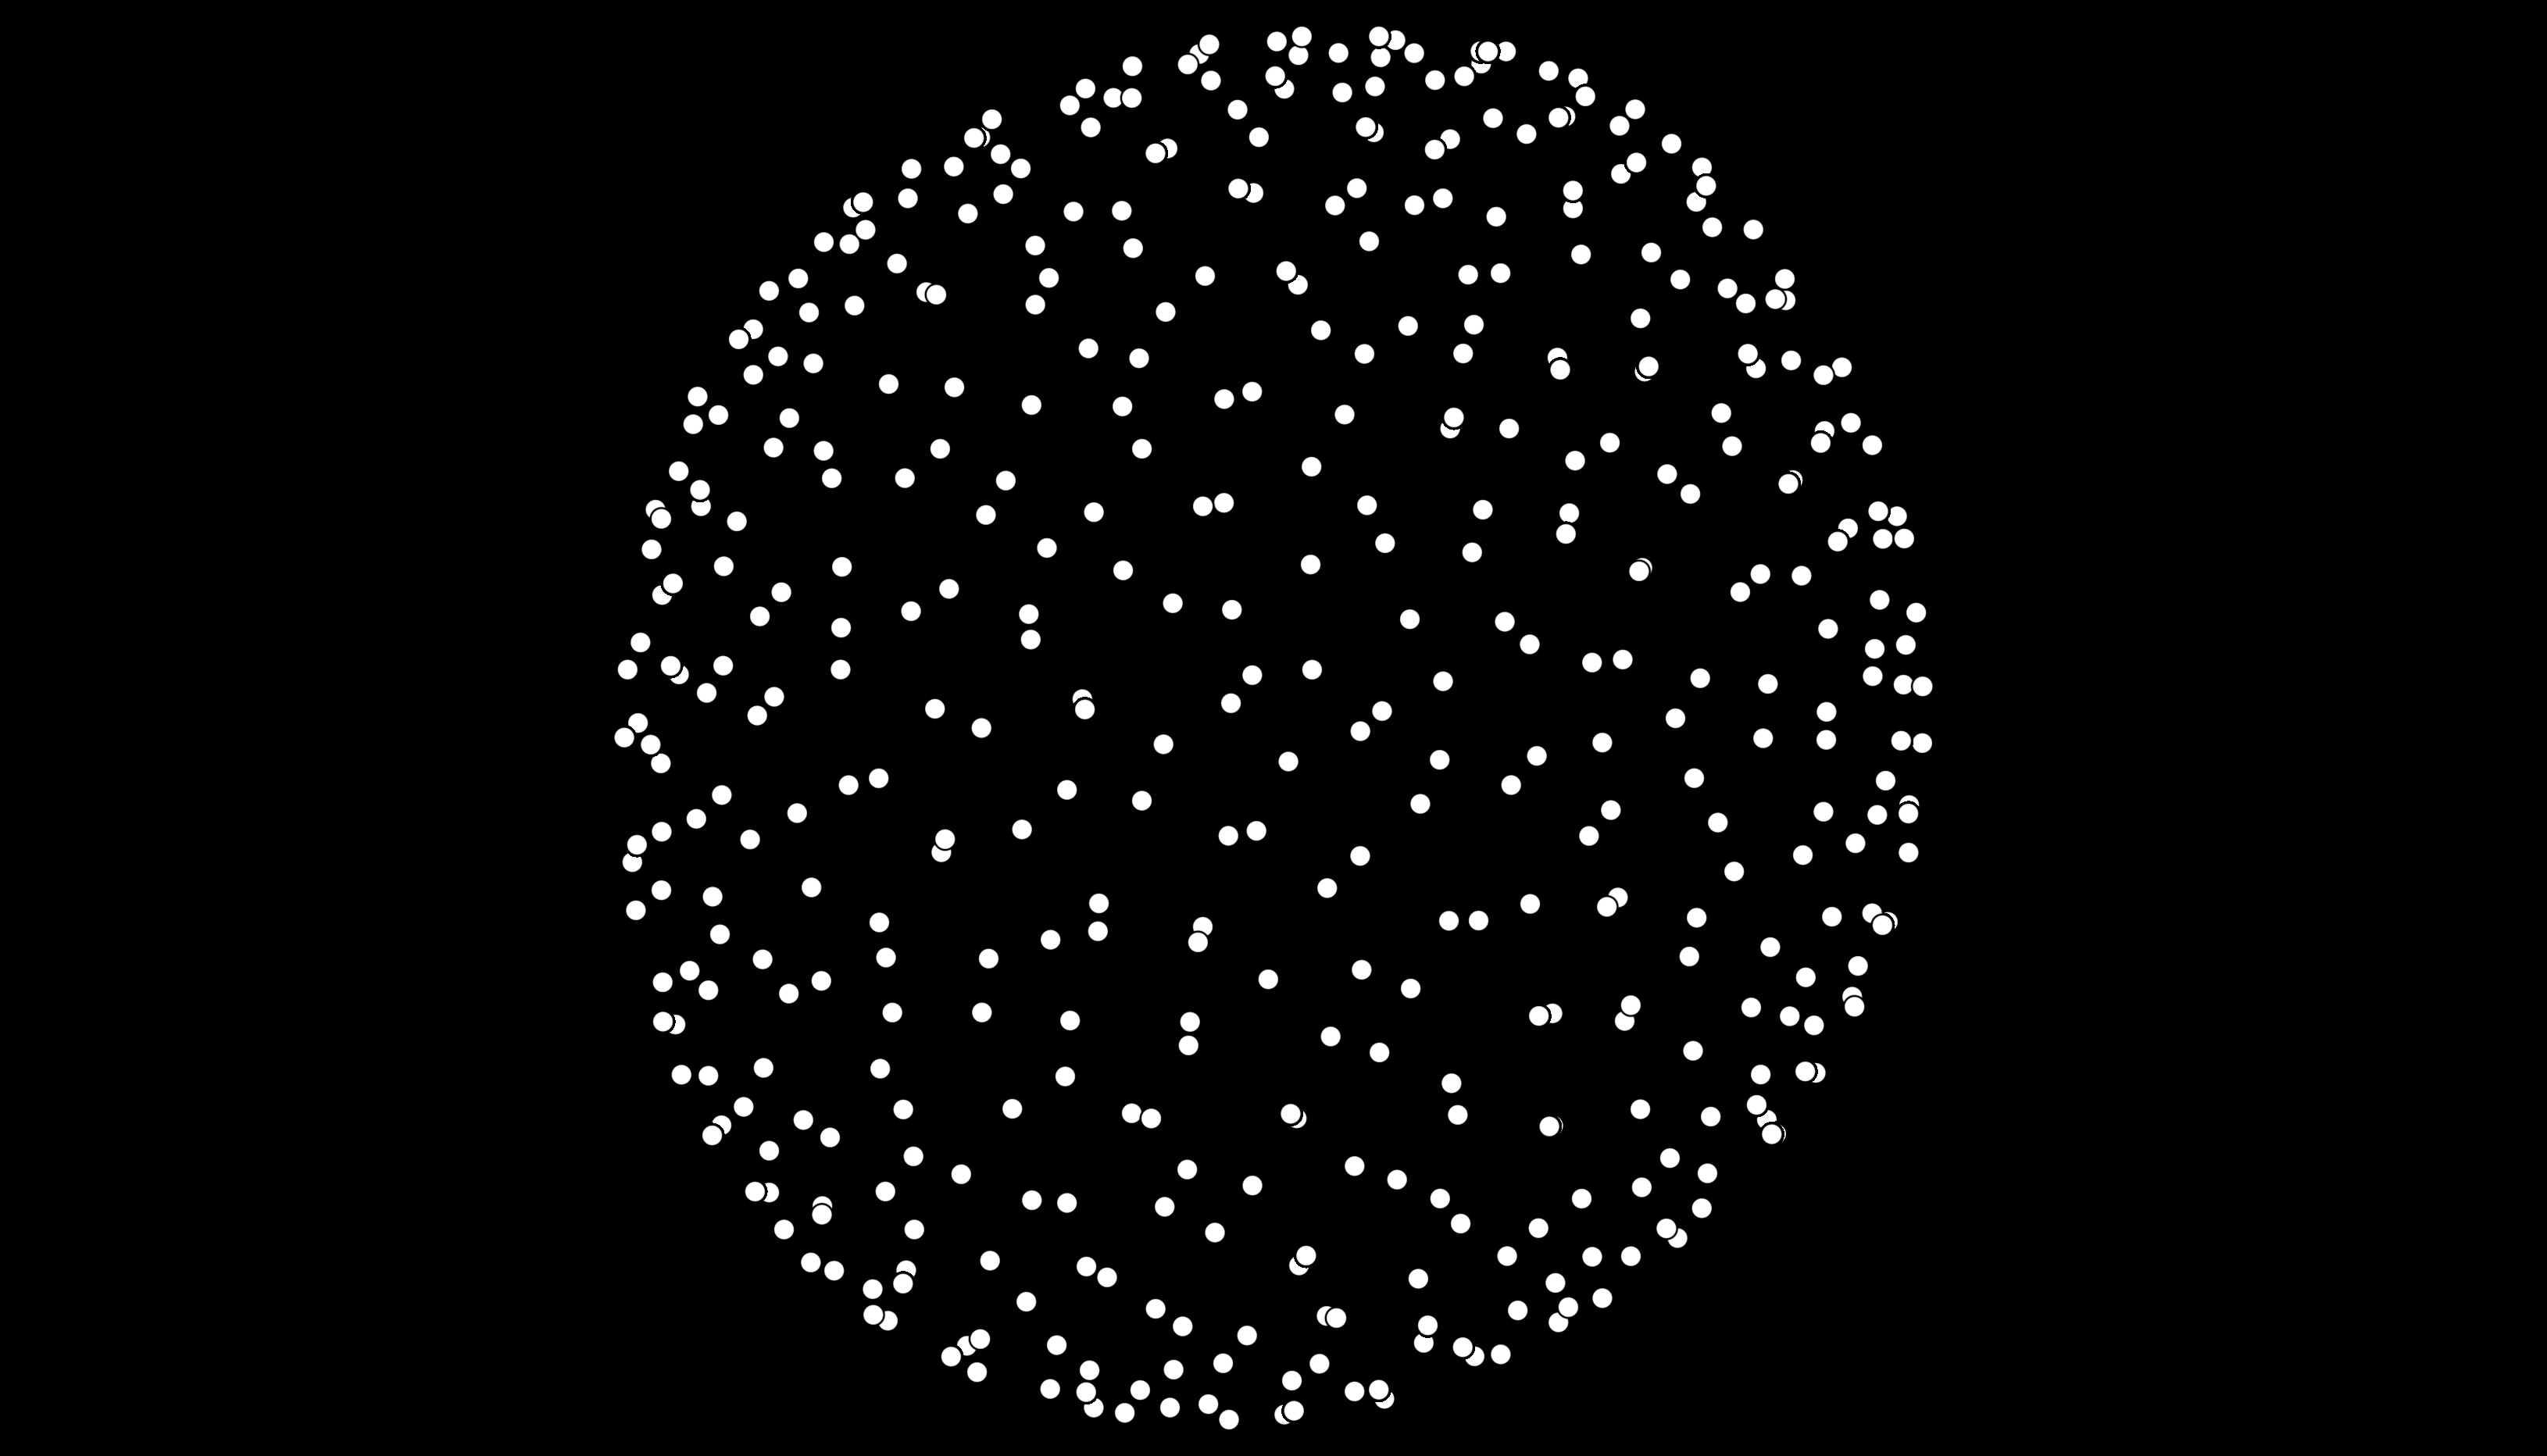

In [5]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_points(pointcloud_list[0], size=0.5, face_color='white')
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Harmonic fit

In this section, we demonstrate how to use the spherical harmonics fit function on a given pointcloud. The relevant parameter is the degree of the fit, `fit_degree`, which was set above.

For high fit degrees, the approximated pointcloud will describe the pointcloud well, but will eventually pick up the noise, too, and be less informative about the principal geometric features of the object. Small fit degrees will only lead to a basic approximation of the object's shape.

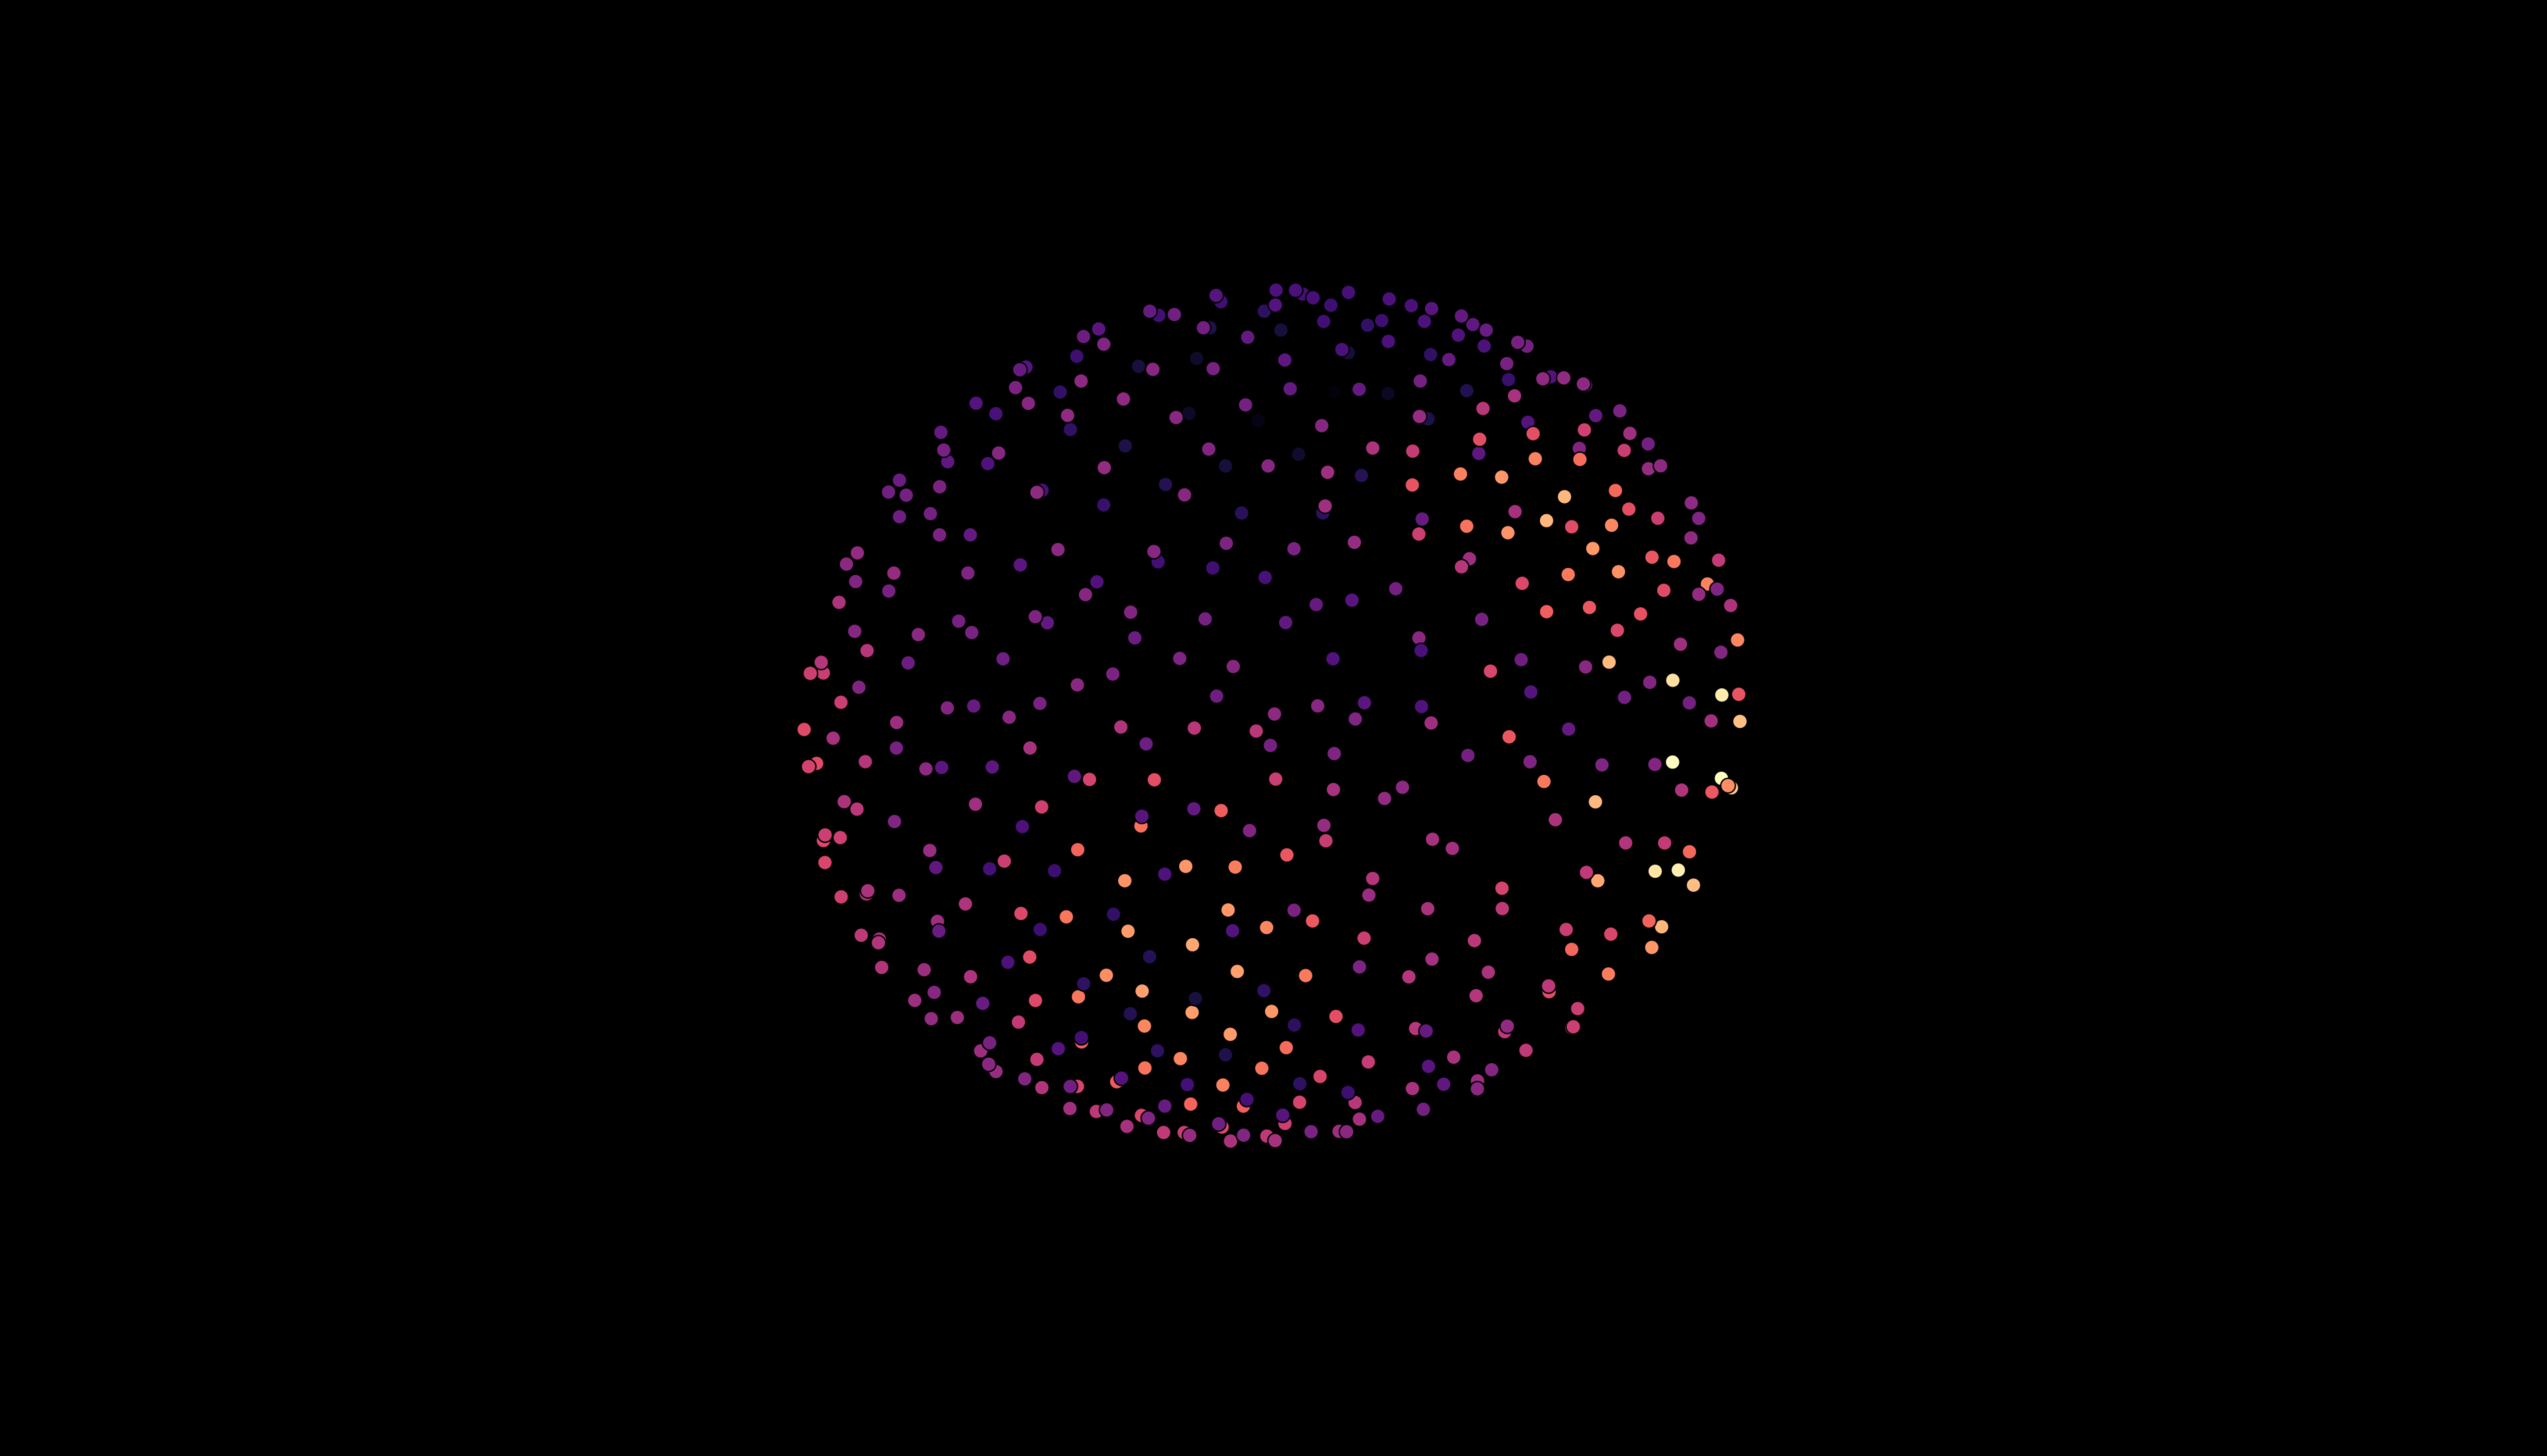

In [8]:
degree = 0
fitted_points = napari_stress.spherical_harmonic_fit(pointcloud_list[0],
                                                    fit_degree=degree)

features = fitted_points[1]['features']
pts_layer = viewer.add_points(fitted_points[0], size=0.5, properties=features, face_color='errors',
                              name=f'degree={degree}', face_colormap='magma')
napari.utils.nbscreenshot(viewer, canvas_only=True)